In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [66]:
data = pd.read_csv('./mnist_784_csv.csv')


In [67]:
features = list(data.columns)[:-1]
target = ["class"]

In [68]:
X = data[features].to_numpy()
y = data[target].to_numpy()

In [69]:
X.shape, y.shape

((70000, 784), (70000, 1))

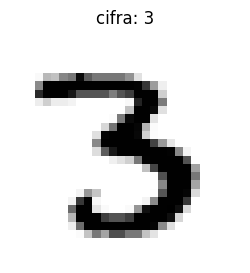

In [70]:
id_digit = 12
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(X[id_digit].reshape(28, 28), cmap='Greys')
ax.set_title(f"cifra: {y[id_digit][0]}")
ax.set_axis_off()
plt.show()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [72]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59500, 784), (59500, 1), (10500, 784), (10500, 1))

In [73]:
model = MLPClassifier(hidden_layer_sizes=(15,13), max_iter=130)

In [ ]:
model.fit(X_train, y_train)

c:\Users\Paolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(f"Accuratezza: {model.score(X_train, y_train):.2f}")
print(f"Accuratezza: {model.score(X_test, y_test):.2f}")

In [ ]:
id_digit = 12
digit = model.predict(X_test[[id_digit]])
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(X[id_digit].reshape(28, 28), cmap='Greys')
ax.set_title(f"cifra: {y[id_digit][0]} - pred: {digit[0]}")
ax.set_axis_off()
plt.show()

In [ ]:
classes = model.classes_
probabilities = model.predict_proba([X_test[id_digit]])[0]
for c,p in zip(classes,probabilities):
    print(f"La cifra è {c}: {p:.4f}")

Quello appena fatto è un test **in sample**

Esiste il test **out of sample**!

In [ ]:
image = plt.imread("./numero.png")
plt.imshow(image, cmap='Greys')

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open("./numero2.png").convert("L")  

image_resized = image.resize((28, 28))

image_array = np.array(image_resized) # Ora ha shape (28, 28)
image_array = 255 - image_array 

image_flattened = image_array.reshape(1, 28*28)  

In [ ]:
digit_prediction = model.predict(image_flattened)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(image_resized, cmap='gray')
ax.set_title(f"Predizione: {digit_prediction[0]}")
ax.set_axis_off()
plt.show()

In [ ]:
classes = model.classes_
probabilities = model.predict_proba(image_flattened)
for c,p in zip(classes,probabilities):
    print(f"La cifra è {c}: {p:.4f}")